## Descriptor Tests

Mikel Ignacio Barajas Martínez \
Visión Computacional

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Load Training Image

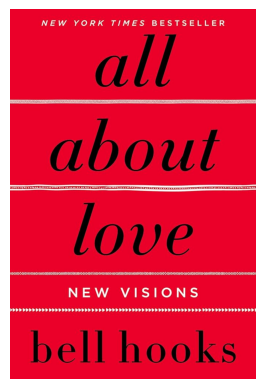

In [2]:
img = cv2.imread('img/train/cover_0.jpg', cv2.IMREAD_COLOR)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Load Test Image

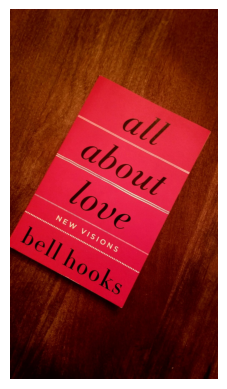

In [3]:
test_img = cv2.imread('img/test/test_0.jpg', cv2.IMREAD_COLOR)
#tranformed_gray = cv2.warpAffine(gray, cv2.getRotationMatrix2D((gray.shape[1]/2, gray.shape[0]/2), 45, 0.5), (gray.shape[1], gray.shape[0]))

cv2.imshow('test image', test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## SIFT

In [4]:
# taken from: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
sift = cv2.SIFT_create()

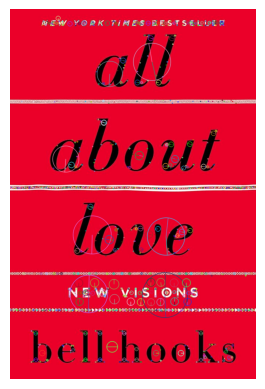

In [5]:
# SIFT on traning image
 
kp, des = sift.detectAndCompute(img, None)
 
feature_img = img.copy()
feature_img = cv2.drawKeypoints(img, kp, feature_img, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT', feature_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('img/out/sift_keypoints.jpg', feature_img)

plt.imshow(cv2.cvtColor(feature_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

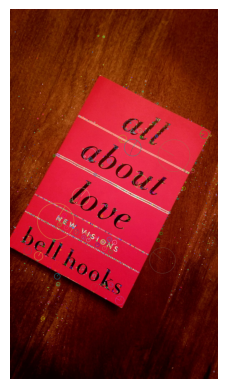

In [6]:
# SIFT on test image
 
kp2, des2 = sift.detectAndCompute(test_img, None)
 
feature_img2 = img.copy()
feature_img2 = cv2.drawKeypoints(test_img, kp2, feature_img2, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT test', feature_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('img/out/sift_keypoints_test.jpg', feature_img2)

plt.imshow(cv2.cvtColor(feature_img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Feature Matching

good matches: 296


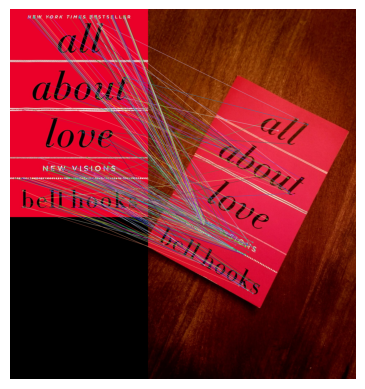

In [7]:
# feature matching, taken from https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des2,k=2)
 
# apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

print(f'good matches: {len(good)}')

# cv.drawMatchesKnn expects list of lists as matches.
match_img = cv2.drawMatchesKnn(img, kp, test_img, kp2, good, None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
cv2.imshow('SIFT Matches', match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('img/out/sift_matches.jpg', match_img)

plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## ORB

In [8]:
# taken from: https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html
orb = cv2.ORB_create()

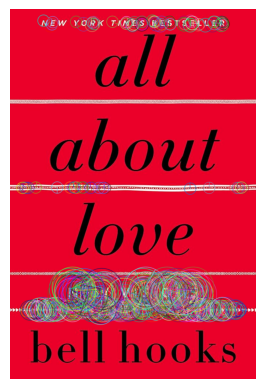

In [9]:
# taken from: https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html

# ORB on traning image
 
kp, des = orb.detectAndCompute(img, None)
 
feature_img = img.copy()
feature_img = cv2.drawKeypoints(img, kp, feature_img, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('ORB', feature_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('img/out/orb_keypoints.jpg', feature_img)

plt.imshow(cv2.cvtColor(feature_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

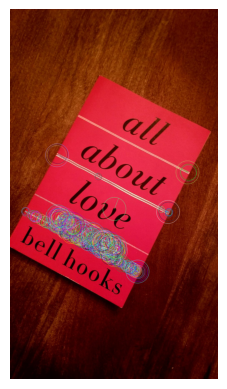

In [10]:
# ORB on test image
 
kp2, des2 = orb.detectAndCompute(test_img, None)
 
feature_img2 = img.copy()
feature_img2 = cv2.drawKeypoints(test_img, kp2, feature_img2, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('ORB test', feature_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('img/out/orb_keypoints_test.jpg', feature_img2)

plt.imshow(cv2.cvtColor(feature_img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

good matches: 30


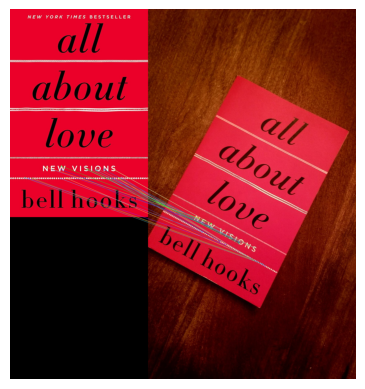

In [11]:
# feature matching, taken from https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des2,k=2)
 
# apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

print(f'good matches: {len(good)}')

# cv.drawMatchesKnn expects list of lists as matches.
match_img = cv2.drawMatchesKnn(img, kp, test_img, kp2, good, None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
cv2.imshow('ORB Matches', match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('img/out/ORB_matches.jpg', match_img)

plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## HOG

In [12]:
win_size = (64, 128)
block_size = (32, 32)
block_stride = (16, 16)
cell_size = (16, 16)
nbins = 9     
 
nbins = 9  
img_size = img.shape[:2]  

hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)

In [13]:
img_resized = cv2.resize(img, win_size)

cv2.imshow('resized image', img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()


h = hog.compute(img_resized)

Data augmentation

In [14]:

def augment_data(img_path, output_path):

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            
    # Apply augmentation techniques to create new images
    flipped_img = cv2.flip(img, 1)
    cv2.imwrite(f'{output_path}/flipped_img.png', flipped_img)

    rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(f'{output_path}/rotated_img.png', rotated_img)

    gaussian_blur_img = cv2.GaussianBlur(img, (5,5), 0)
    cv2.imwrite(f'{output_path}/gaussian_blur_img.png', gaussian_blur_img)

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
    cv2.imwrite(f'{output_path}/gray_img.png', gray_img)

    color_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
    cv2.imwrite(f'{output_path}/color_img.png', color_img)
    
    height, width, channels = img.shape
    third_width = width // 3
    third_height = height // 3

    for i in range(3):
        for j in range(3):
            patch_img = img[i * third_height:(i + 1) * third_height, j * third_width:(j + 1) * third_width]
            cv2.imwrite(f'{output_path}/patch_{i}_{j}.png', patch_img)



In [15]:
augment_data('img/train/aal/original.png', 'img/train/aal')
augment_data('img/train/op/original.png', 'img/train/op')
augment_data('img/train/tomats/original.png', 'img/train/tomats')

SVMs (HOG)

In [16]:
import os 

img_paths = ['img/train/aal', 'img/train/op', 'img/train/tomats']

X = []
y = []

class_match = {'img/train/aal': 0, 'img/train/op': 1, 'img/train/tomats': 2}

for img_path in img_paths:
    for img in os.listdir(img_path):
        img = cv2.imread(f'{img_path}/{img}', cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, win_size)
        h = hog.compute(img_resized)
        X.append(h)
        y.append(class_match[img_path])

In [17]:
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int32)

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,
                     100000,
                     1e-8))
 
svm.train(X, cv2.ml.ROW_SAMPLE, y)
 
# Save the SVM model
svm.save('svm_model.yml')
print(svm.getSupportVectors())

[[0.10866796 0.01629193 0.01868331 ... 0.07816195 0.04942802 0.30821514]
 [0.06129948 0.06074582 0.15933582 ... 0.06675357 0.04966583 0.09435056]
 [0.25579205 0.1428621  0.16876464 ... 0.1532501  0.13087432 0.2090122 ]
 ...
 [0.07907519 0.06404716 0.08176377 ... 0.12038671 0.14476752 0.22093181]
 [0.13656996 0.13841312 0.17299223 ... 0.18164654 0.12606315 0.11458209]
 [0.25850365 0.17629683 0.12331934 ... 0.00853477 0.03092355 0.1663316 ]]


In [18]:
svm = cv2.ml.SVM_load('svm_model.yml')
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
hog.setSVMDetector(svm.getSupportVectors()[0])
 
locations, scores = hog.detectMultiScale(img)
x, y, w, h = locations[np.argmax(scores.flatten())]
window = img[y:y+h, x:x+w]
window = cv2.resize(window, win_size)

cv2.imshow('detected window', window)
cv2.waitKey(0)
cv2.destroyAllWindows()

features = hog.compute(window).flatten()
pred = svm.predict(features.reshape(1, -1))[1][0]
print(pred)

[2.]


In [19]:
img = cv2.imread('img/test/test_0.jpg', cv2.IMREAD_COLOR)

locations, scores = hog.detectMultiScale(img)
x, y, w, h = locations[np.argmax(scores.flatten())]

window = img[y:y+h, x:x+w]
window = cv2.resize(window, win_size)

cv2.imshow('detected window', window)
cv2.waitKey(0)
cv2.destroyAllWindows()

features = hog.compute(window).flatten()
pred = svm.predict(features.reshape(1, -1))[1][0]
print(pred)

[2.]


Explicit Tests (To see if it works)

In [20]:
explicit_img = cv2.imread('img/train/aal/original.png', cv2.IMREAD_COLOR)
explicit_img = cv2.resize(explicit_img, win_size)

cv2.imshow('explicit window', explicit_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

features = hog.compute(explicit_img).flatten()
pred = svm.predict(features.reshape(1, -1))[1][0]
print(pred)

[0.]


In [21]:
explicit_img = cv2.imread('img/train/op/original.png', cv2.IMREAD_COLOR)
explicit_img = cv2.resize(explicit_img, win_size)

cv2.imshow('explicit window', explicit_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

features = hog.compute(explicit_img).flatten()
pred = svm.predict(features.reshape(1, -1))[1][0]
print(pred)

[1.]


In [22]:
explicit_img = cv2.imread('img/train/tomats/original.png', cv2.IMREAD_COLOR)
explicit_img = cv2.resize(explicit_img, win_size)

cv2.imshow('explicit window', explicit_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

features = hog.compute(explicit_img).flatten()
pred = svm.predict(features.reshape(1, -1))[1][0]
print(pred)

[2.]


Test with videocapture

In [23]:
# get image from webcam

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    locations, scores = hog.detectMultiScale(frame)
    x, y, w, h = locations[np.argmax(scores.flatten())]
    window = frame[y:y+h, x:x+w]
    window = cv2.resize(window, win_size)

    features = hog.compute(window).flatten()
    pred = svm.predict(features.reshape(1, -1))[1][0]
    print(pred)

    cv2.imshow('window', window)

[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
[2.]
